In [1]:
import numpy as np #library operasi numerical
import matplotlib.pyplot as plt #visualisasi data
%matplotlib inline
import keras #Library untuk pembangunan model
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
np.random.seed(0) 

In [3]:
from keras.datasets import mnist #import library MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load data set MNIST

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


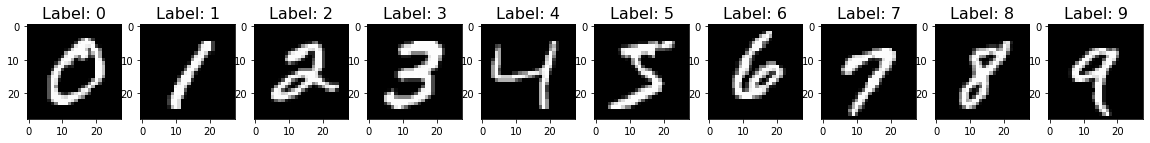

In [5]:
#Menampilkan sample data dari keseluruhan data set, berdasar kelas
#Terdapat 10 kelas yaitu dari angka 0 hingga 9
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
	sample = x_train[y_train == i][0]
	ax[i].imshow(sample, cmap='gray')
	ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
# Mekonversi data set menjadi matriks
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
#Normalisasi data dengan nilai rgb untuk warna putih (255)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
#transform matriks ke 1 dimensi
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)


In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model2 = Sequential()
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])


In [15]:
#Training model
batch_size = 512
epochs=10
model2.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)
model2.summary()

Epoch 1/10
118/118 [==============================] - 1s 6ms/step - loss: 0.6830 - acc: 0.8270
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2813 - acc: 0.9223
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2267 - acc: 0.9377
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1944 - acc: 0.9460
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1728 - acc: 0.9518
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1549 - acc: 0.9564
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1414 - acc: 0.9600
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1293 - acc: 0.9638
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1201 - acc: 0.9664
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1113 - acc: 0.9689
Model: "sequential_4"
___________________________

In [16]:
#Evaluasi Model
test_loss, test_acc = model2.evaluate(x_test, y_test)
test_acc = test_acc * 100
test_loss = test_loss * 100
print("Test Loss: {}%, Test Accuracy: {}%".format(test_loss, test_acc))

313/313 [==============================] - 1s 1ms/step - loss: 0.1239 - acc: 0.9630
Test Loss: 12.38948255777359%, Test Accuracy: 96.29999995231628%


In [17]:
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[1.03772445e-05 3.06723251e-08 1.14268900e-04 ... 9.96183693e-01
  7.97262692e-06 2.99203704e-04]
 [1.40436132e-05 1.33604929e-03 9.94333029e-01 ... 7.21904581e-09
  6.40736907e-05 1.24471544e-08]
 [5.14318781e-05 9.84235764e-01 3.95762455e-03 ... 5.71689662e-03
  3.61885899e-03 2.65475654e-04]
 ...
 [1.04323838e-08 8.16548251e-09 3.31926451e-08 ... 1.24983380e-05
  1.73730296e-04 1.83933857e-03]
 [2.66919074e-07 5.12898168e-08 1.93246557e-08 ... 3.01411092e-07
  1.81063064e-04 2.16113616e-08]
 [3.28136991e-07 5.26960364e-10 1.31799936e-06 ... 1.97347716e-09
  7.01999958e-10 6.96497482e-09]]
[7 2 1 ... 4 5 6]


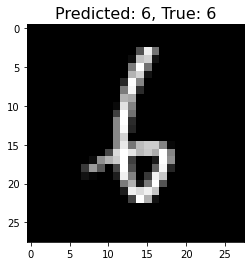

In [18]:
#Evaluasi model dengan data testing
random_idx = np.random.choice(len(x_test)) #mengambil random data dari data test
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')